In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import mdtraj as md
import matplotlib as mpl



In [103]:
def plot_dist(chain,resid,angle,resname='',legend=False,xlabel=False,ylabel=False): #,location):  
    
    #decide which chain
    if chain == 'A':
        residue = resid
    elif chain == 'B':
        if angle == 'phi':
            residue = resid + 1146
        elif angle == 'psi':
            residue = resid + 1145
    elif chain == 'C':
        if angle == 'phi':
            residue = resid + 2292
        elif angle == 'psi':
            residue = resid + 2291
    
    
    dih_closed = np.loadtxt('dihedral-data/'+angle+'_residue_%d_traj_2'%residue)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/'+angle+'_residue_%d_traj_19'%residue)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/'+angle+'_residue_%d_traj_35'%residue)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    #ax = fig.add_subplot(2,2,location)

    plt.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    plt.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    #plt.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    
    closed_pdb = np.loadtxt('/home/dhiman/PhD/coronavirus/MSM/pdb_dihedral_angles/closed_6vxx_dihedrals.dat')
    if angle == 'phi':
        dih_closed_pdb = closed_pdb[residue-2,1]
    elif angle == 'psi':
        dih_closed_pdb = closed_pdb[residue-2,2]
        
    part_open_pdb = np.loadtxt('/home/dhiman/PhD/coronavirus/MSM/pdb_dihedral_angles/partially_open_6vsb_dihedrals.dat')
    if angle == 'phi':
        dih_part_open_pdb = part_open_pdb[residue-2,1]
    elif angle == 'psi':
        dih_part_open_pdb = part_open_pdb[residue-2,2]
        
    full_open_pdb = np.loadtxt('/home/dhiman/PhD/coronavirus/MSM/pdb_dihedral_angles/fully_open_6vyb_dihedrals.dat')
    #In PDB 6VYB the chains are ordered BCA where B is open. So we need to change the order
    if chain == 'C':
        residue2 = resid 
    elif chain == 'A':
        if angle == 'phi':
            residue2 = resid + 1146
        elif angle == 'psi':
            residue2 = resid + 1145
    elif chain == 'B':
        if angle == 'phi':
            residue2 = resid + 2292
        elif angle == 'psi':
            residue2 = resid + 2291
    
    if angle == 'phi':
        dih_full_open_pdb = full_open_pdb[residue2-2,1]
    elif angle == 'psi':
        dih_full_open_pdb = full_open_pdb[residue2-2,2]
        
    plt.scatter(dih_closed_pdb,0.05,s=100,marker='o',c='b',label='6VXX')
    plt.scatter(dih_part_open_pdb,0.05,s=100,marker='o',c='orange',label='6VSB')
    plt.scatter(dih_full_open_pdb,0.05,s=100,marker='o',c='g',label='6VYB')
        
    if legend==True:
        plt.legend(fontsize=20)
    if xlabel == True:
        plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=24)
    if ylabel == True:
        plt.ylabel('Probability density',fontsize=24)
    
    plt.xlim(-180,180)
    
    plt.title('Chain '+chain+': '+resname+' '+str(resid)+' '+angle.upper(), fontsize=24)
    
    plt.tick_params(labelsize=18)



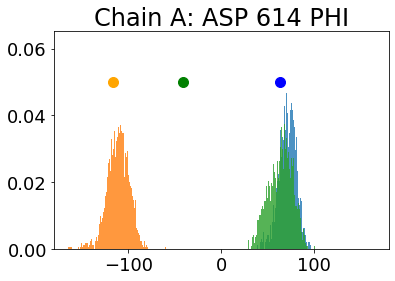

In [98]:
plot_dist('A',614,'phi',resname='ASP')

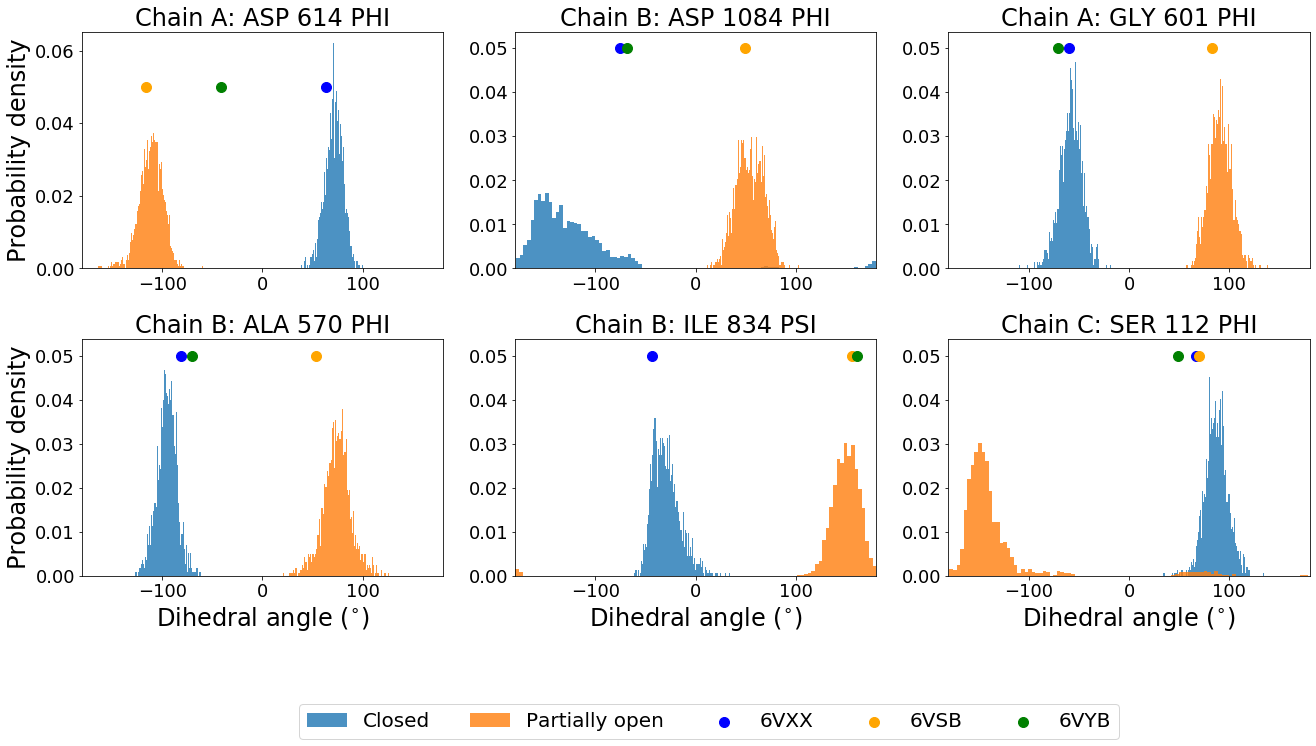

In [104]:
fig = plt.figure(figsize=(22,10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(2,3,1)
plot_dist('A',614,'phi',resname='ASP',ylabel=True)
plt.subplot(2,3,2)
plot_dist('B',1084,'phi',resname='ASP')
plt.subplot(2,3,3)
plot_dist('A',601,'phi',resname='GLY')
plt.subplot(2,3,4)
plot_dist('B',570,'phi',resname='ALA',ylabel=True,xlabel=True)
plt.subplot(2,3,5)
plot_dist('B',834,'psi',resname='ILE',xlabel=True)
plt.subplot(2,3,6)
plot_dist('C',112,'phi',resname='SER',xlabel=True)

plt.legend(fontsize=20,ncol=6,bbox_to_anchor=(0.5, -0.5))
#plt.show()
plt.savefig('dihedral-distribution-overall.pdf',bbox_inches='tight')

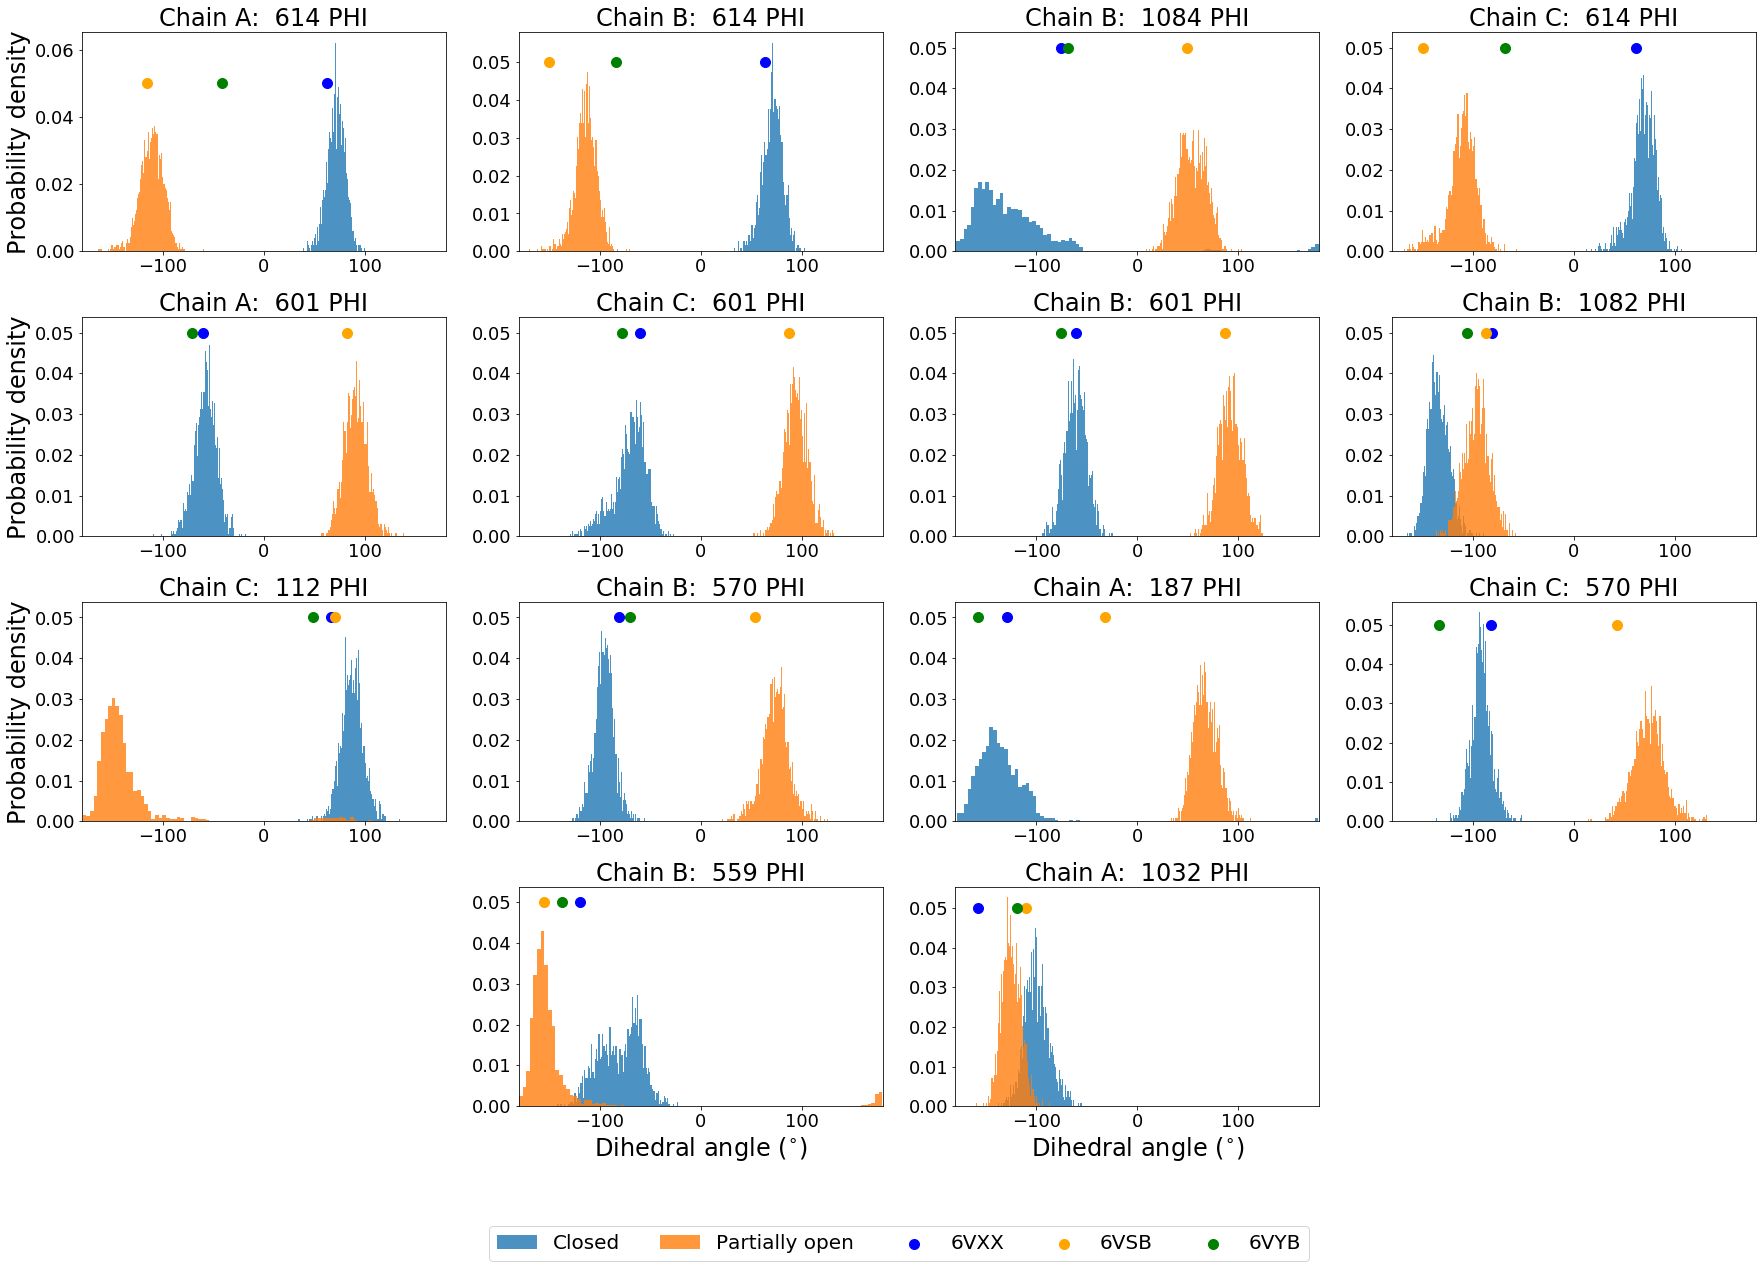

In [107]:
#SI Figure (Phi)
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(5,4,1)
plot_dist('A',614,'phi',ylabel=True)
plt.subplot(5,4,2)
plot_dist('B',614,'phi')
plt.subplot(5,4,3)
plot_dist('B',1084,'phi')
plt.subplot(5,4,4)
plot_dist('C',614,'phi')
plt.subplot(5,4,5)
plot_dist('A',601,'phi',ylabel=True)
plt.subplot(5,4,6)
plot_dist('C',601,'phi')
plt.subplot(5,4,7)
plot_dist('B',601,'phi',)
plt.subplot(5,4,8)
plot_dist('B',1082,'phi')
plt.subplot(5,4,9)
plot_dist('C',112,'phi',ylabel=True)
plt.subplot(5,4,10)
plot_dist('B',570,'phi')
plt.subplot(5,4,11)
plot_dist('A',187,'phi')
plt.subplot(5,4,12)
plot_dist('C',570,'phi')
plt.subplot(5,4,14)
plot_dist('B',559,'phi',xlabel=True)
plt.subplot(5,4,15)
plot_dist('A',1032,'phi',xlabel=True)

plt.legend(fontsize=20,ncol=5,bbox_to_anchor=(1.0, -0.5))
#plt.show()
plt.savefig('dihedral-distribution-SI-Phi.pdf',bbox_inches='tight')

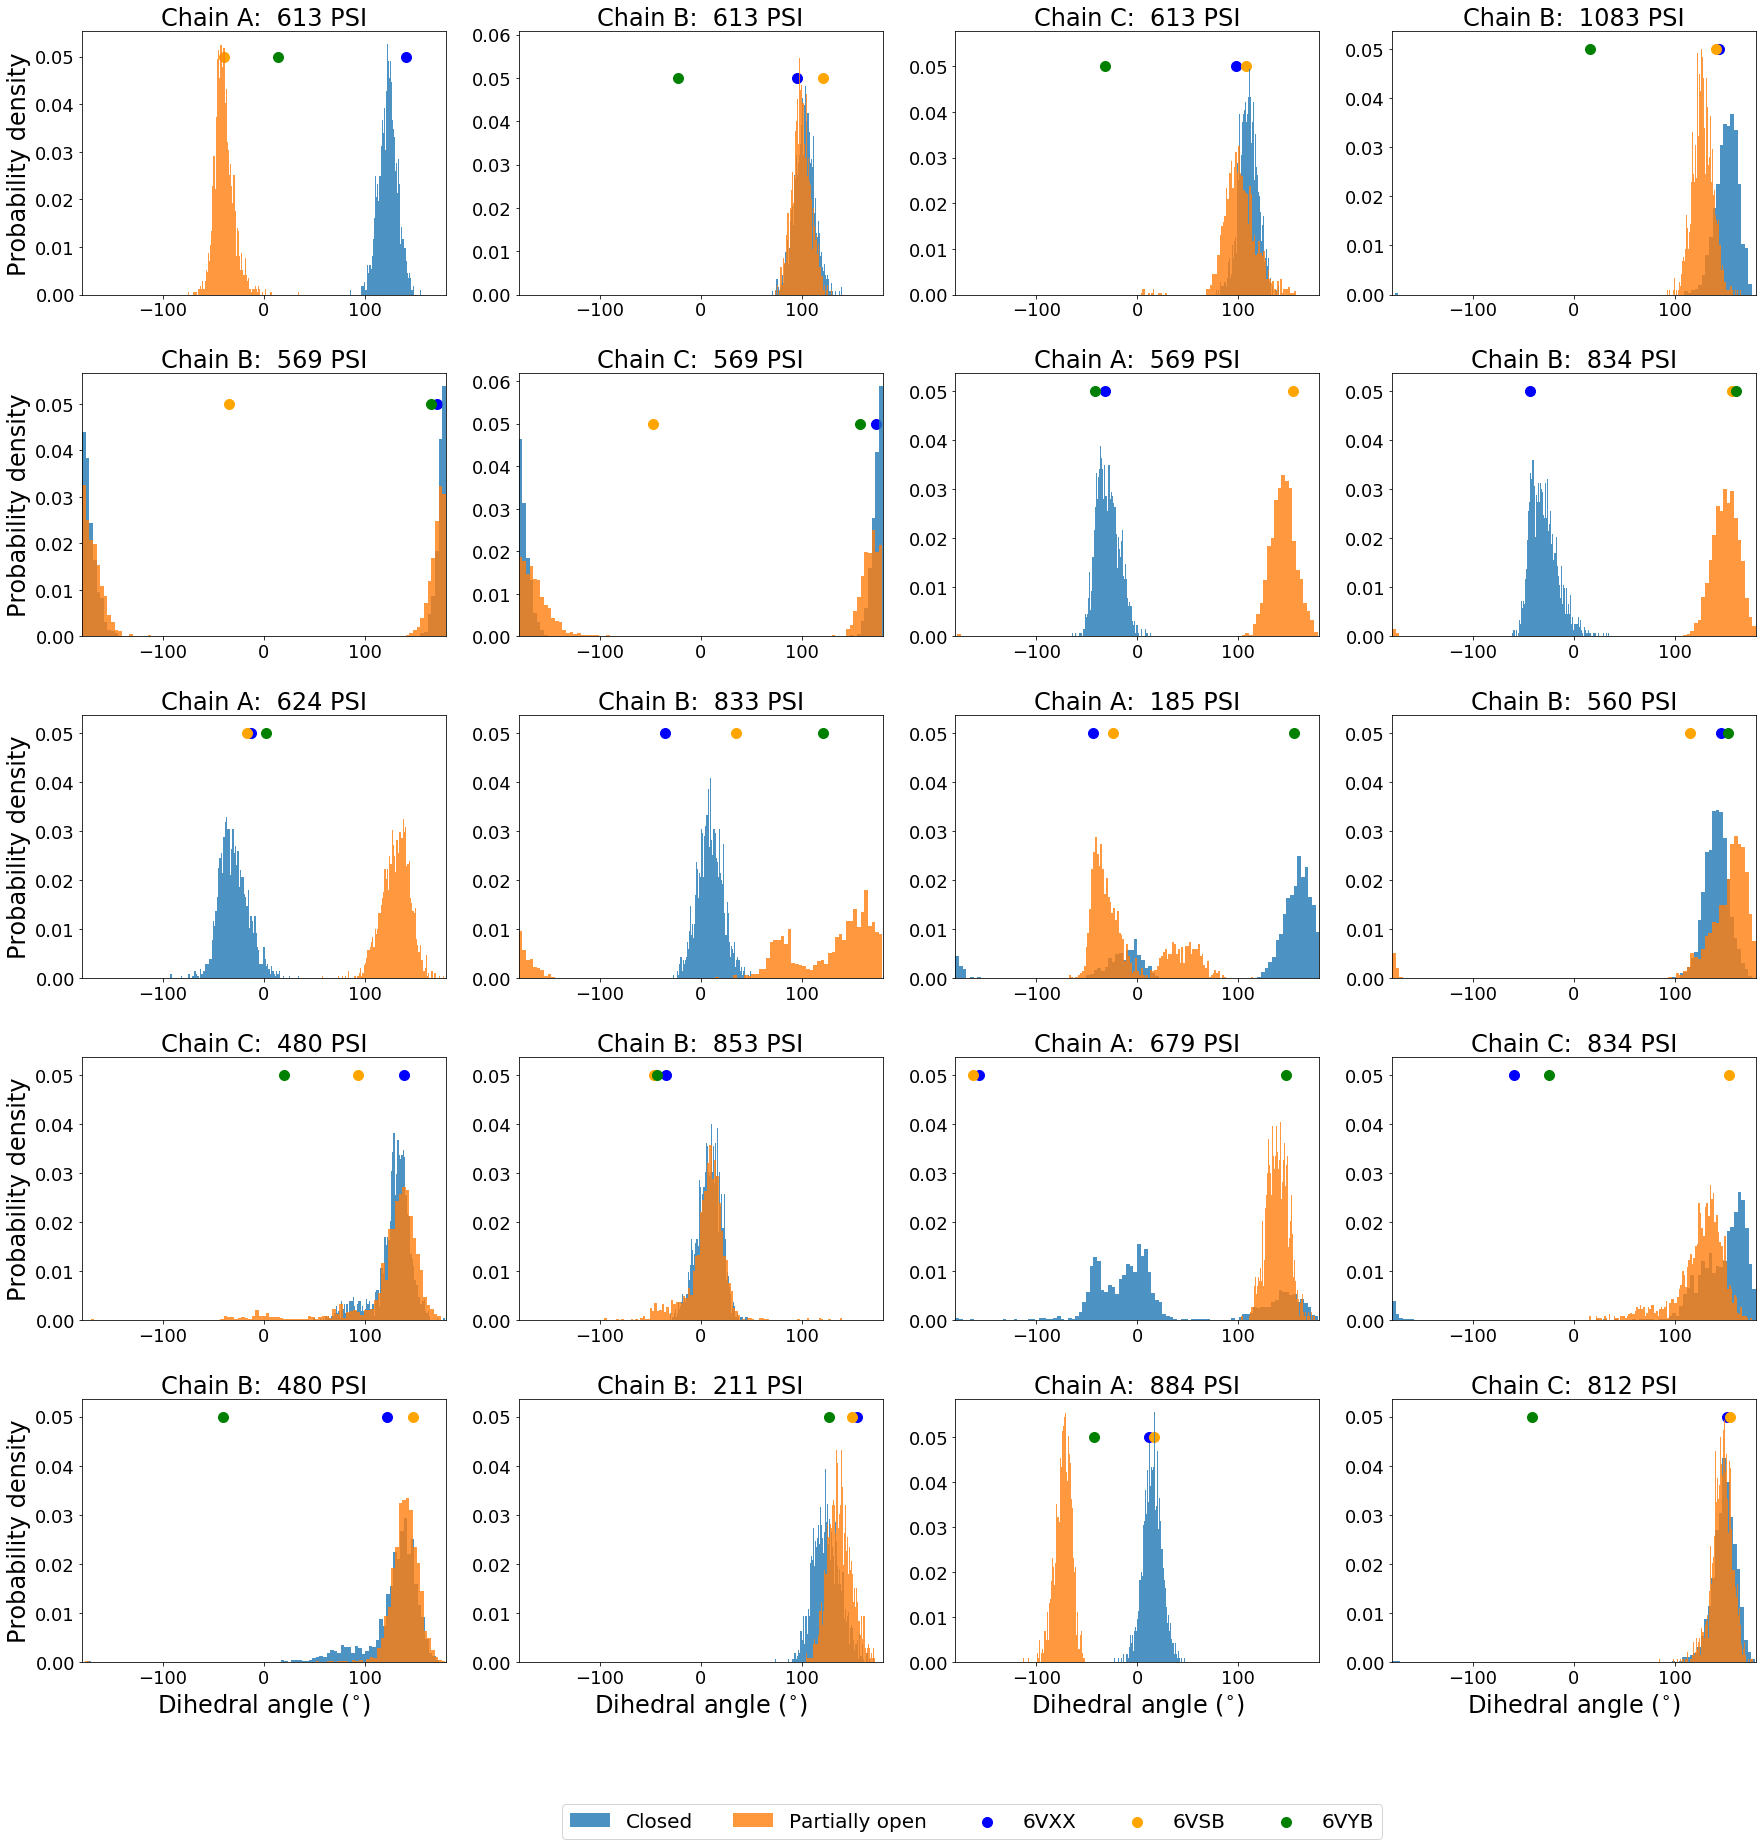

In [110]:
#SI Figure (Psi)
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(5,4,1)
plot_dist('A',613,'psi',ylabel=True)
plt.subplot(5,4,2)
plot_dist('B',613,'psi')
plt.subplot(5,4,3)
plot_dist('C',613,'psi')
plt.subplot(5,4,4)
plot_dist('B',1083,'psi')
plt.subplot(5,4,5)
plot_dist('B',569,'psi',ylabel=True)
plt.subplot(5,4,6)
plot_dist('C',569,'psi')
plt.subplot(5,4,7)
plot_dist('A',569,'psi',)
plt.subplot(5,4,8)
plot_dist('B',834,'psi')
plt.subplot(5,4,9)
plot_dist('A',624,'psi',ylabel=True)
plt.subplot(5,4,10)
plot_dist('B',833,'psi')
plt.subplot(5,4,11)
plot_dist('A',185,'psi')
plt.subplot(5,4,12)
plot_dist('B',560,'psi')
plt.subplot(5,4,13)
plot_dist('C',480,'psi',ylabel=True)
plt.subplot(5,4,14)
plot_dist('B',853,'psi')
plt.subplot(5,4,15)
plot_dist('A',679,'psi')
plt.subplot(5,4,16)
plot_dist('C',834,'psi')
plt.subplot(5,4,17)
plot_dist('B',480,'psi',ylabel=True,xlabel=True)
plt.subplot(5,4,18)
plot_dist('B',211,'psi',xlabel=True)
plt.subplot(5,4,19)
plot_dist('A',884,'psi',xlabel=True)
plt.subplot(5,4,20)
plot_dist('C',812,'psi',xlabel=True)



plt.legend(fontsize=20,ncol=5,bbox_to_anchor=(0, -0.5))
#plt.show()
plt.savefig('dihedral-distribution-SI-Psi.pdf',bbox_inches='tight')

In [10]:
#writing sorted correlation data in verbose format
def get_chain(index):
    '''decide which chain'''
    if index < 2292:
        chain = 'A'
    elif index >= 2292 and angle < 4584:
        chain = 'B'
    elif index >= 4584:
        chain = 'C'
    return chain
    
l = np.loadtxt('sorted_tIC_1_cos_corr.dat')
f1 = open('sorted_tIC_1_cos_corr_verbose.dat','w')
print('#Chain  #Torsion angle & Residue   #Correlation with tIC',file=f1)
for i in range(len(l)):
    chain = get_chain(l[i,0])
    print(chain,feat.describe()[int(l[i,0])],l[i,1],file=f1)
f1.close()

l = np.loadtxt('sorted_tIC_1_sin_corr.dat')
f1 = open('sorted_tIC_1_sin_corr_verbose.dat','w')
print('#Chain  #Torsion angle & Residue   #Correlation with tIC',file=f1)
for i in range(len(l)):
    chain = get_chain(l[i,0])
    print(chain,feat.describe()[int(l[i,0])],l[i,1],file=f1)
f1.close()

l = np.loadtxt('sorted_tIC_2_cos_corr.dat')
f1 = open('sorted_tIC_2_cos_corr_verbose.dat','w')
print('#Chain  #Torsion angle & Residue   #Correlation with tIC',file=f1)
for i in range(len(l)):
    chain = get_chain(l[i,0])
    print(chain,feat.describe()[int(l[i,0])],l[i,1],file=f1)
f1.close()

l = np.loadtxt('sorted_tIC_2_sin_corr.dat')
f1 = open('sorted_tIC_2_sin_corr_verbose.dat','w')
print('#Chain  #Torsion angle & Residue   #Correlation with tIC',file=f1)
for i in range(len(l)):
    chain = get_chain(l[i,0])
    print(chain,feat.describe()[int(l[i,0])],l[i,1],file=f1)
f1.close()
    
    

#Make plots of the top 2 positive and negative correlation (tIC 1)
N = 10
l = np.loadtxt('sorted_tIC_1_corr.dat')
for i in range(N):
    angle = l[i,0]
    corr = l[i,1]
    #print(angle)
    
    #decide which chain
    if angle < 1400:
        chain = 'Chain A'
    elif angle > 1400 and angle < 2800:
        chain = 'Chain B'
    elif angle > 2800:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    plt.hist(dih_closed,bins=100,density=True,label='Closed')
    plt.hist(dih_fully_open,bins=100,density=True,label='Fully open')
    plt.hist(dih_partially_open,bins=100,density=True,label='Partially open')
    plt.legend(fontsize=16)
    plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    plt.ylabel('Probability density',fontsize=16)
    
    
    plt.title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr,fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()



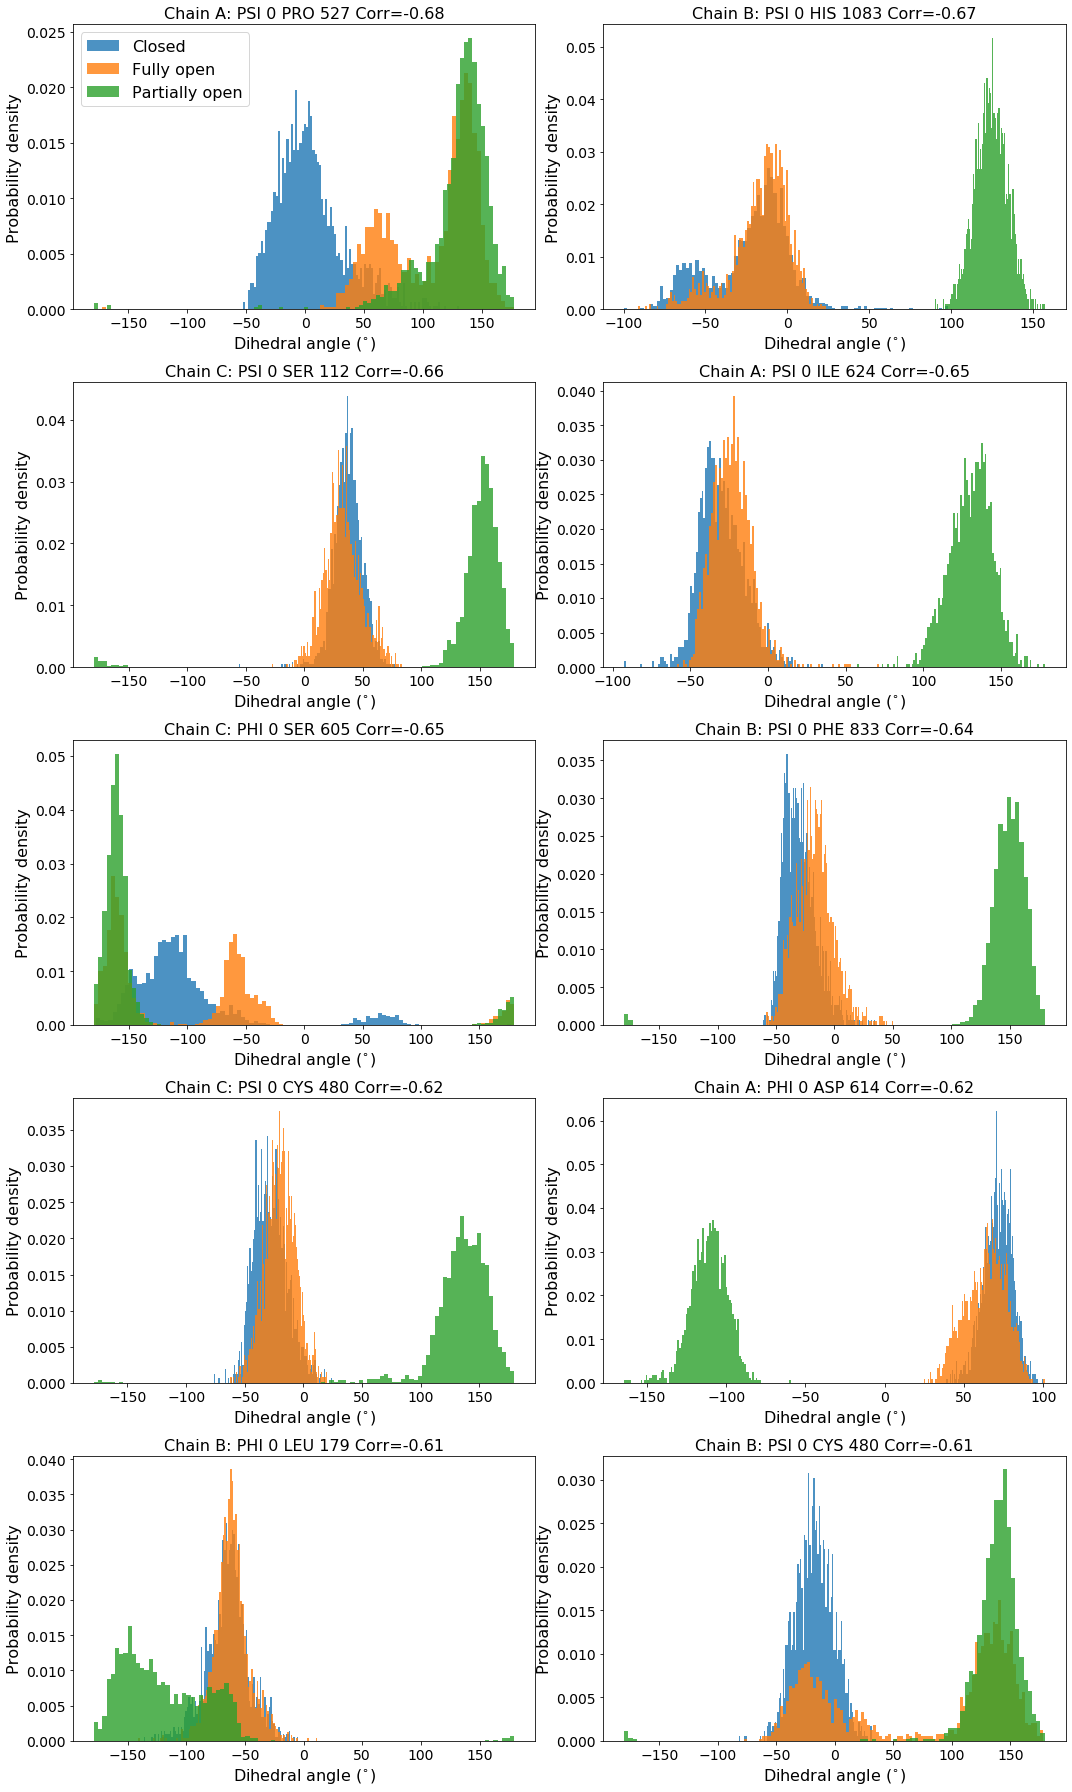

In [4]:
#Make plots of the top 10 positive and negative correlation (tIC 1 cos)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_1_cos_corr.dat')
for i in range(N):
    
    angle = l[i,0]
    corr = l[i,1]
   
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)
    #plot_dist(l,i)

plt.tight_layout()

plt.savefig('dihedral_dist_negative_tIC_1_cos.pdf')

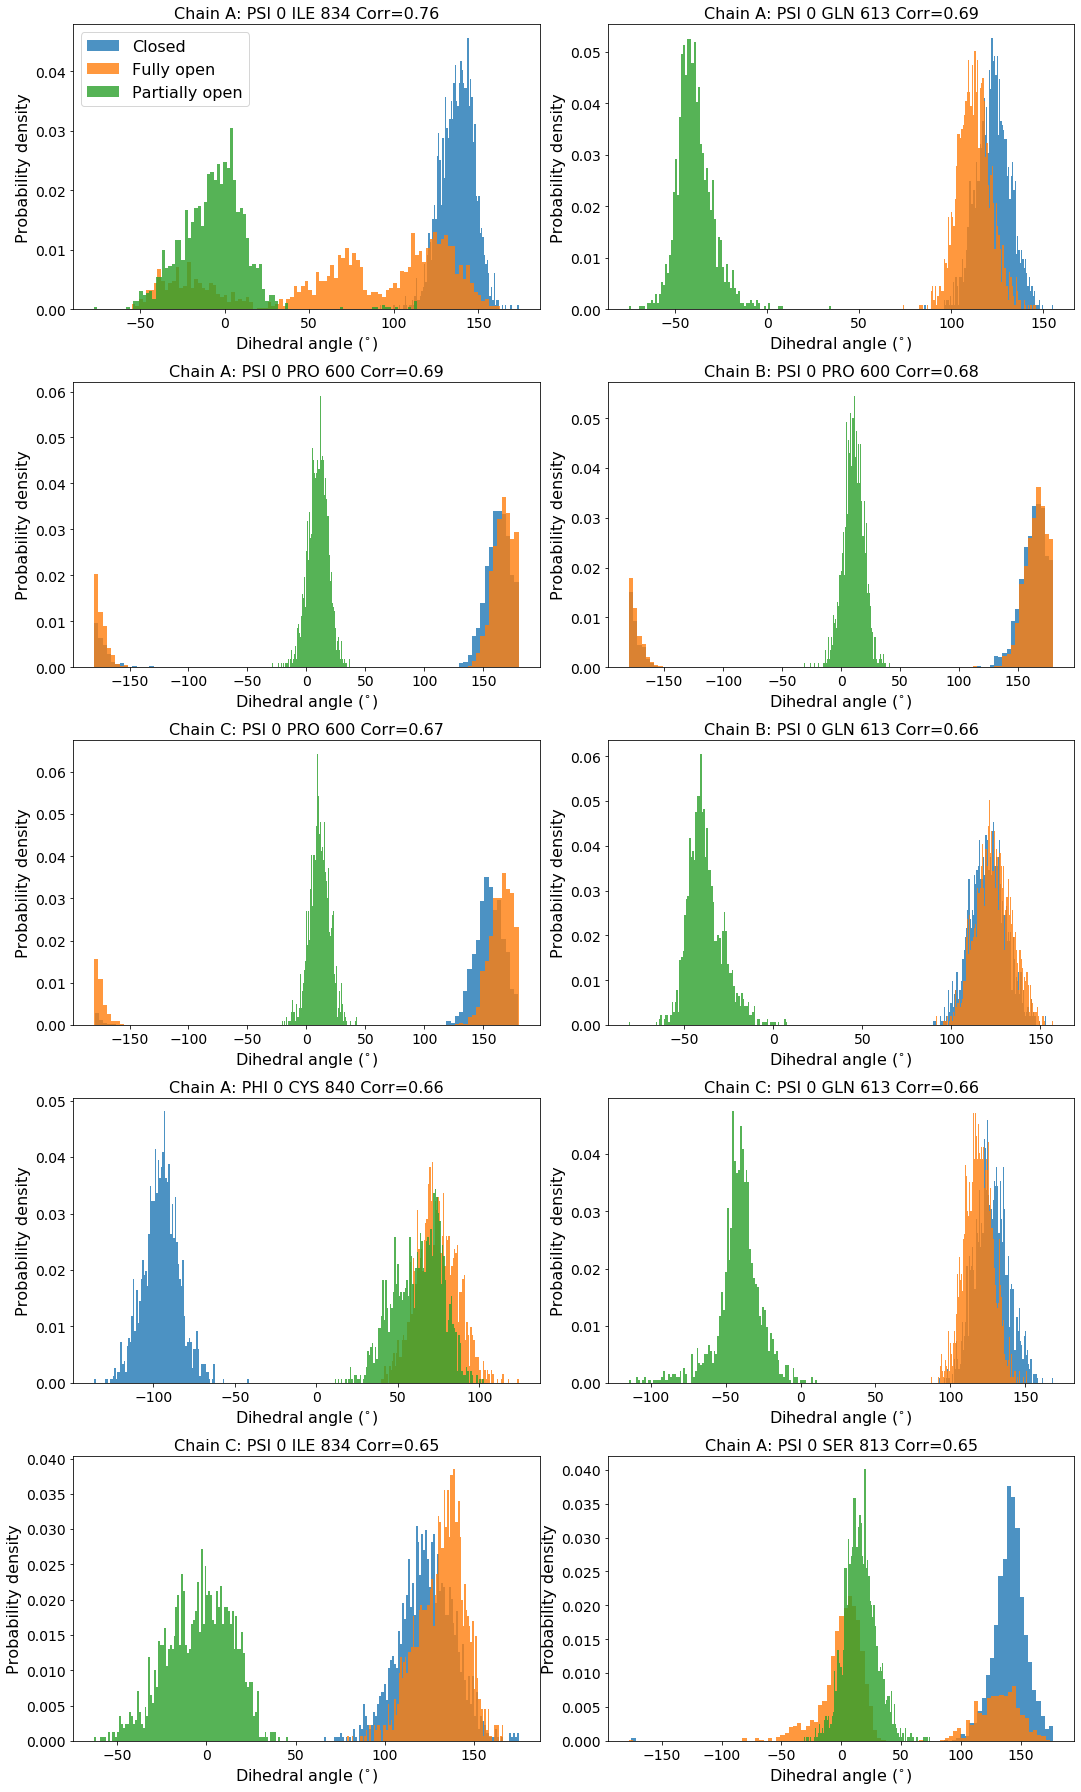

In [5]:
#Make plots of the top 10 positive and positive correlation (tIC 1 cos)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_1_cos_corr.dat')
for i in range(N):
    angle = l[-(i+1),0]
    corr = l[-(i+1),1]
   
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_positive_tIC_1_cos.pdf')

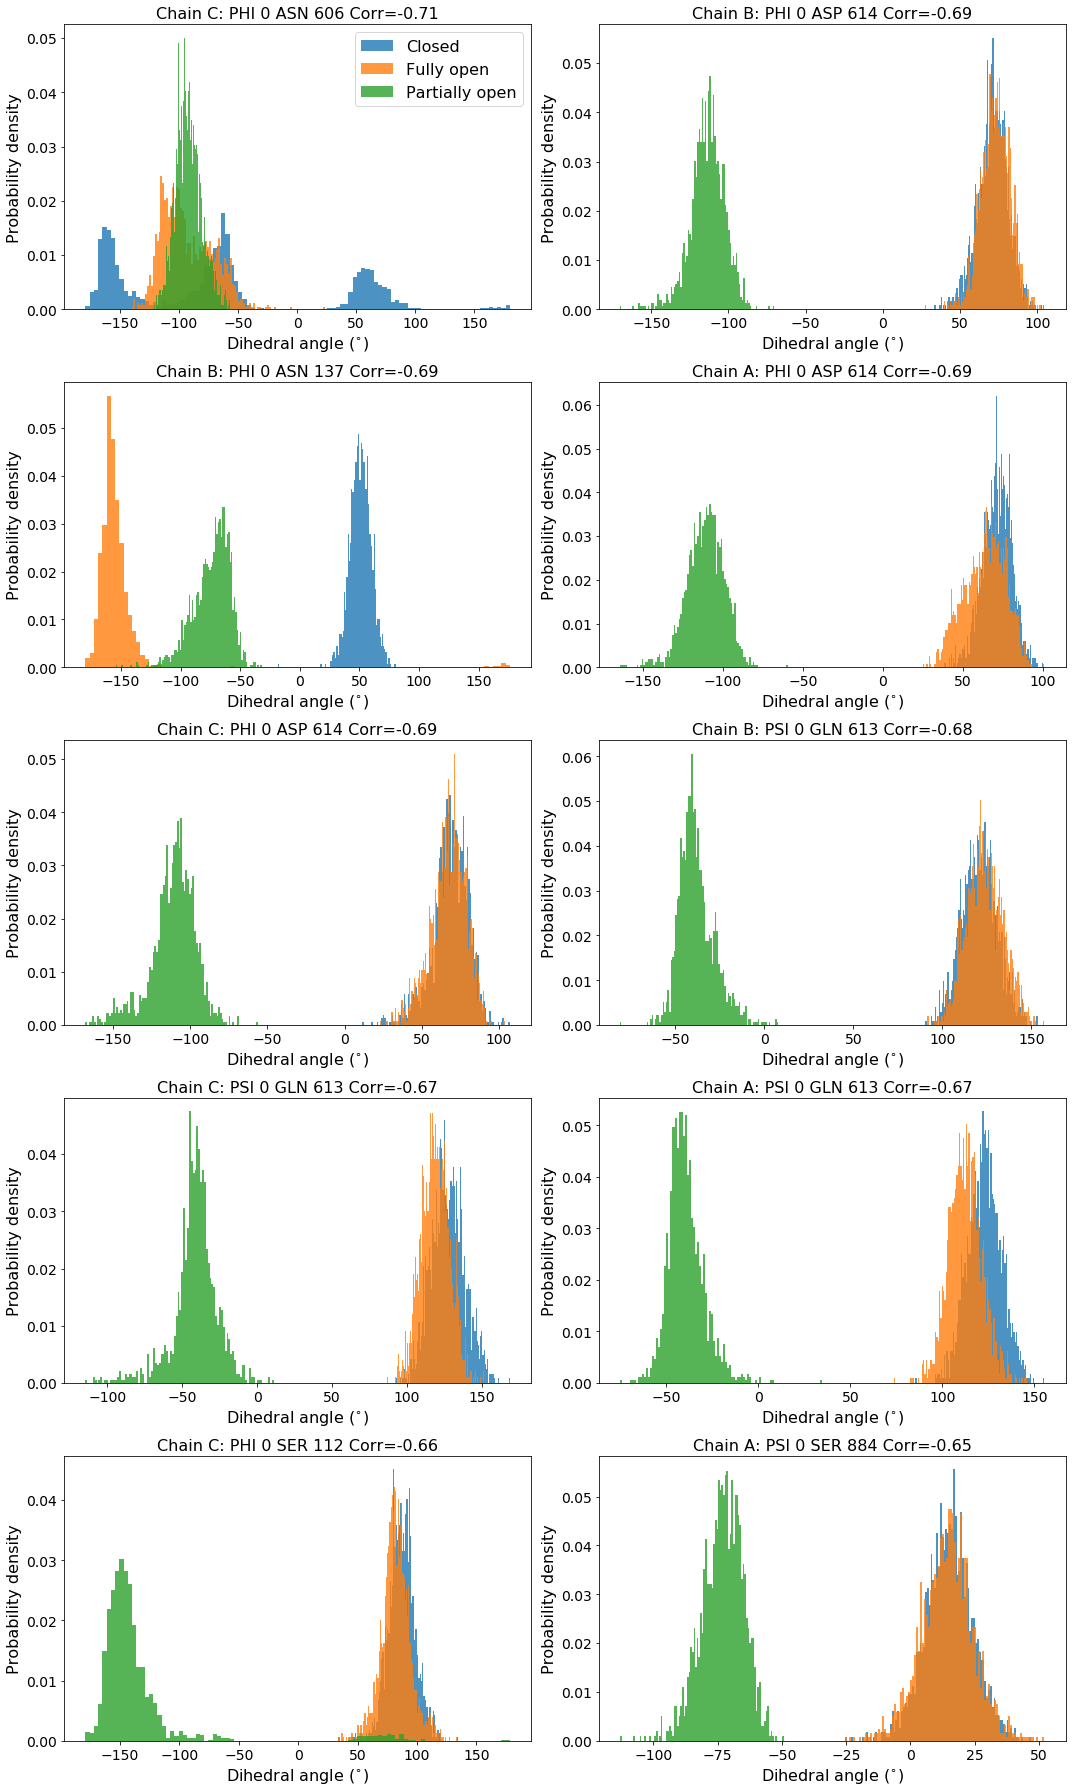

In [6]:
#Make plots of the top 10 positive and negative correlation (tIC 1 sin)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_1_sin_corr.dat')
for i in range(N):
    angle = l[i,0]
    corr = l[i,1]
   
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_negative_tIC_1_sin.pdf')

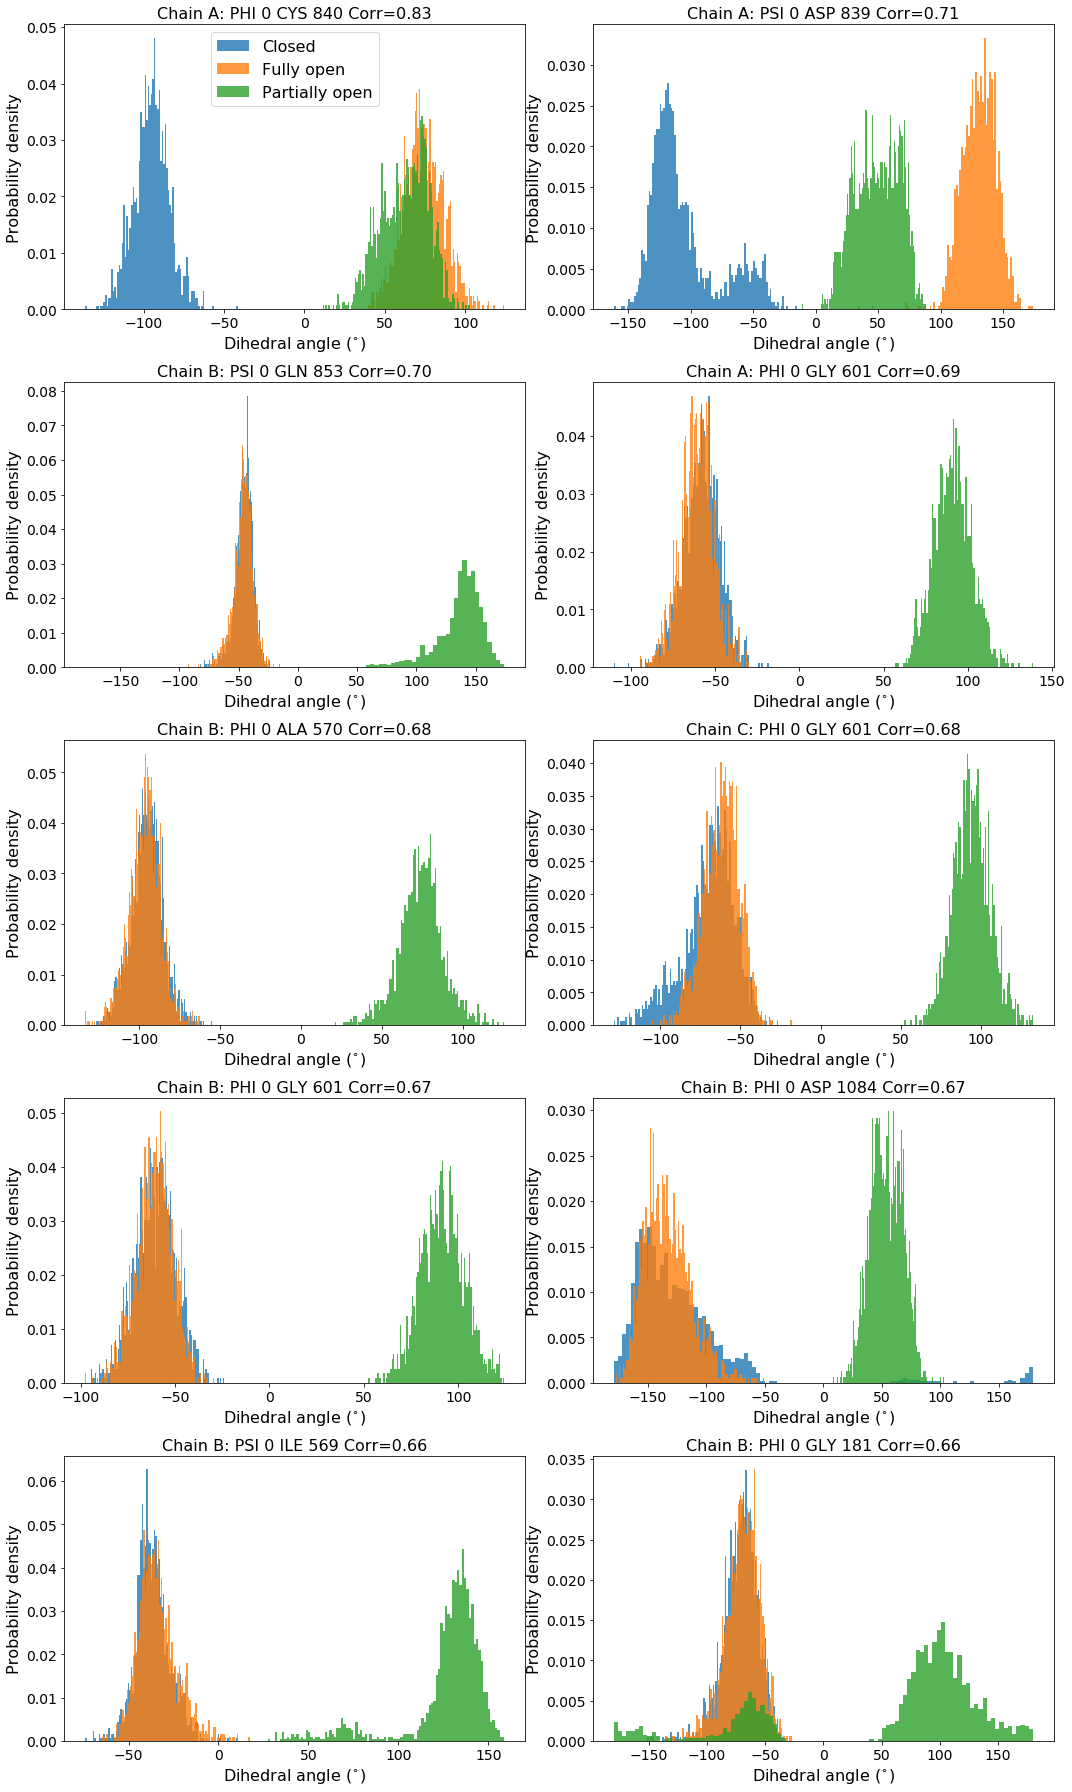

In [7]:
#Make plots of the top 10 positive and positive correlation (tIC 1 sin)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_1_sin_corr.dat')
for i in range(N):
    angle = l[-(i+1),0]
    corr = l[-(i+1),1]
   
     
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)

    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_positive_tIC_1_sin.pdf')

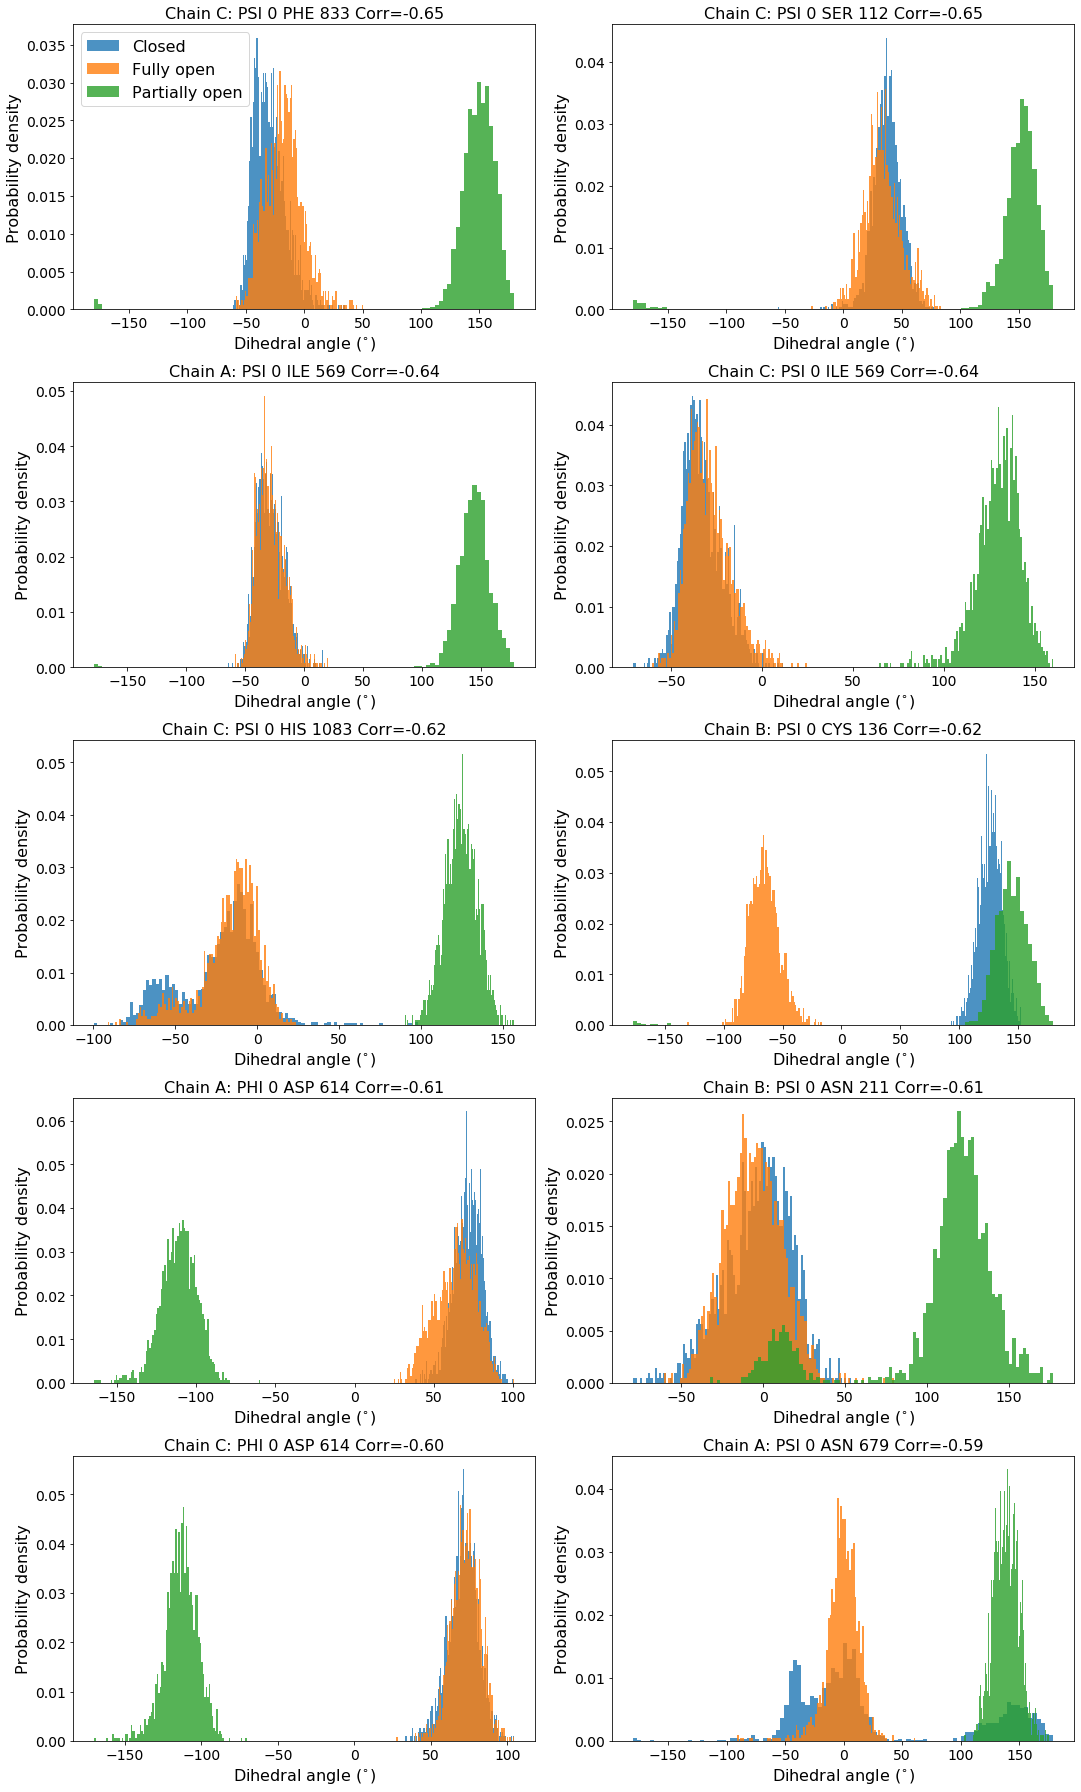

In [8]:
#Make plots of the top 10 negative correlation (tIC 2 cos)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_2_cos_corr.dat')
for i in range(N):
    angle = l[i,0]
    corr = l[i,1]
   
    
    #decide which chain
    if angle < 1400:
        chain = 'Chain A'
    elif angle > 1400 and angle < 2800:
        chain = 'Chain B'
    elif angle > 2800:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_negative_tIC_2_cos.pdf')

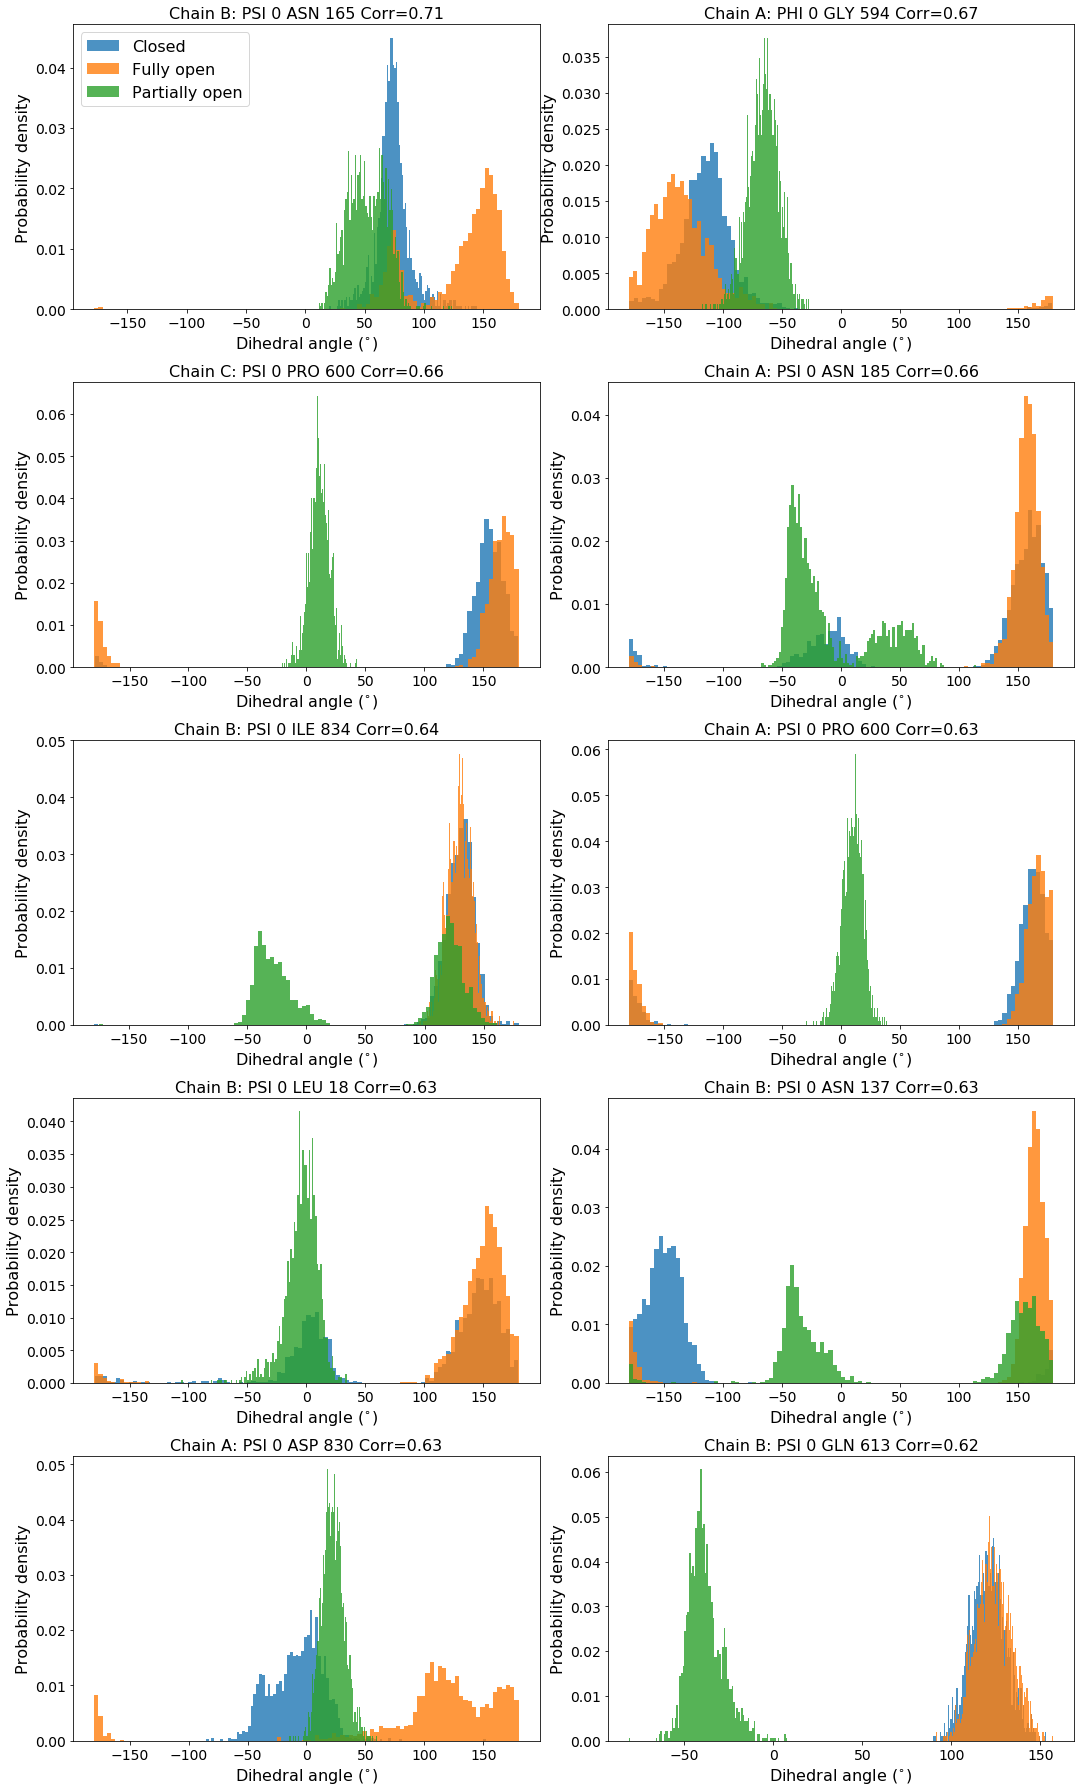

In [9]:
#Make plots of the top 10 positive and positive correlation (tIC 2 cos)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_2_cos_corr.dat')
for i in range(N):
    angle = l[-(i+1),0]
    corr = l[-(i+1),1]
   
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_positive_tIC_2_cos.pdf')

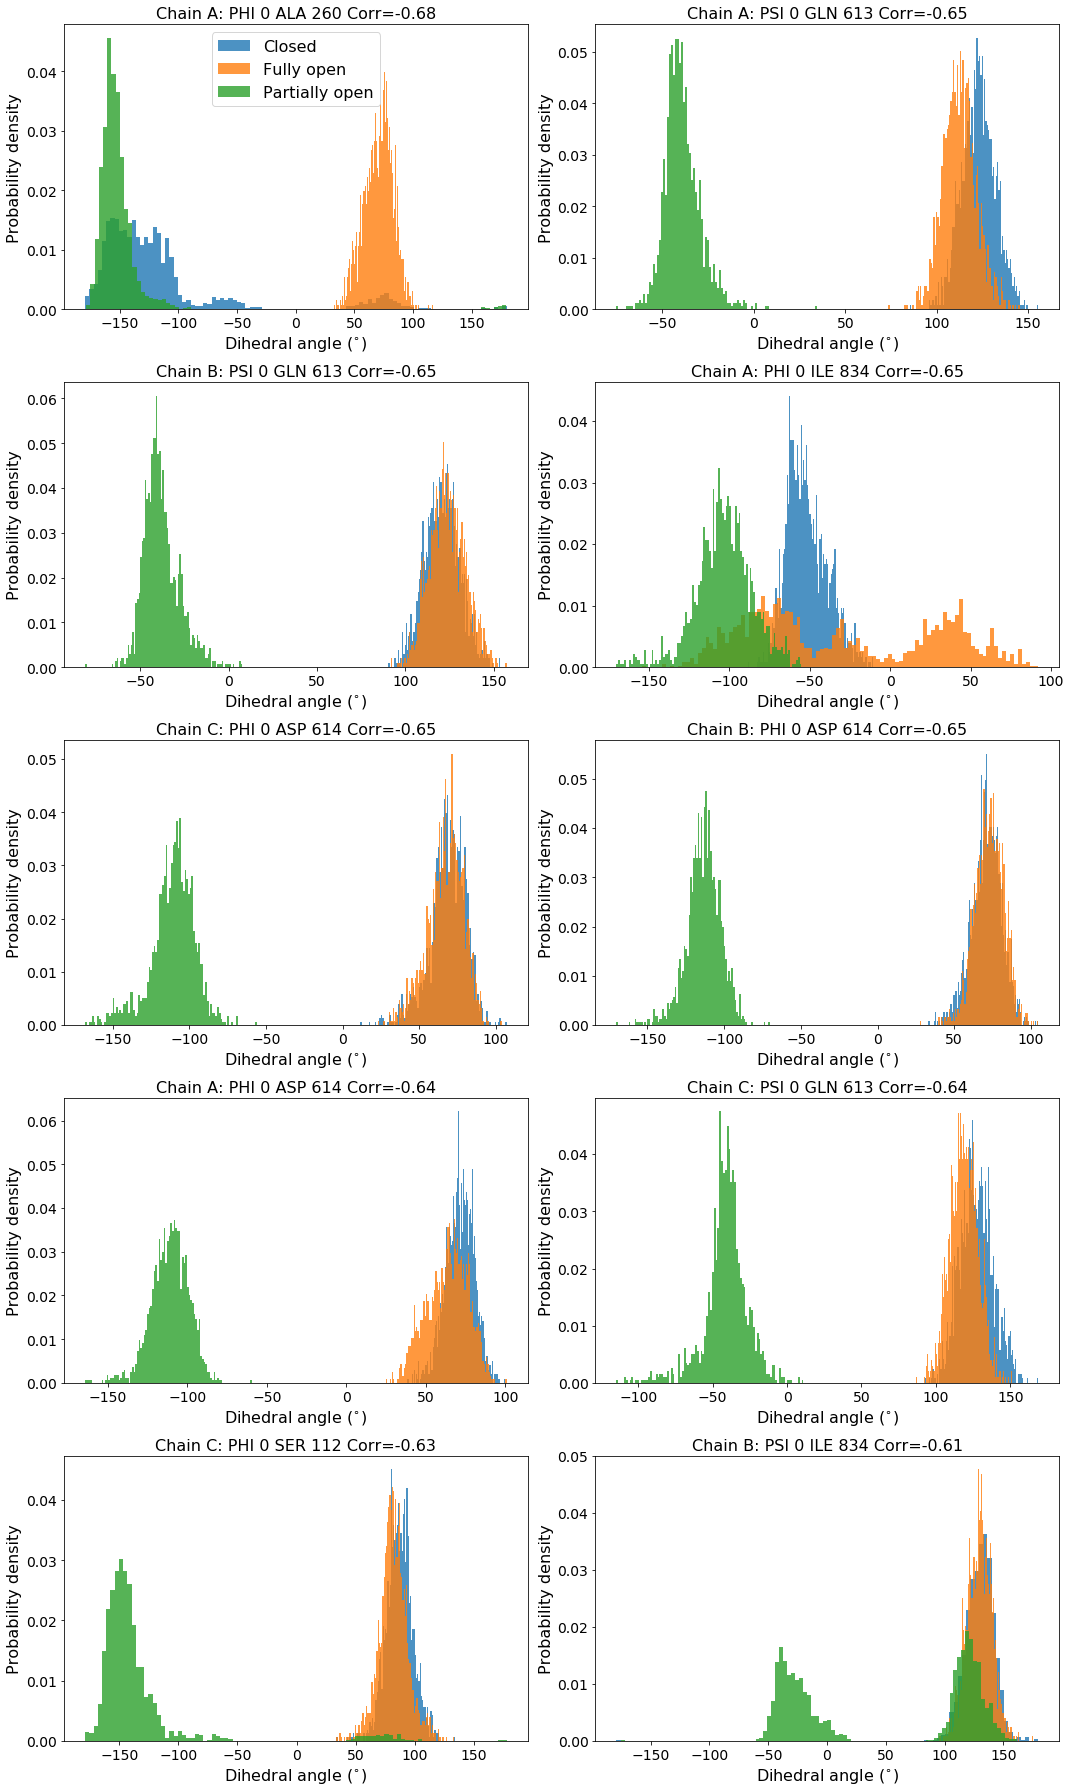

In [10]:
#Make plots of the top 10 negative correlation (tIC 2 sin)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_2_sin_corr.dat')
for i in range(N):
    angle = l[i,0]
    corr = l[i,1]
   
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_negative_tIC_2_sin.pdf')

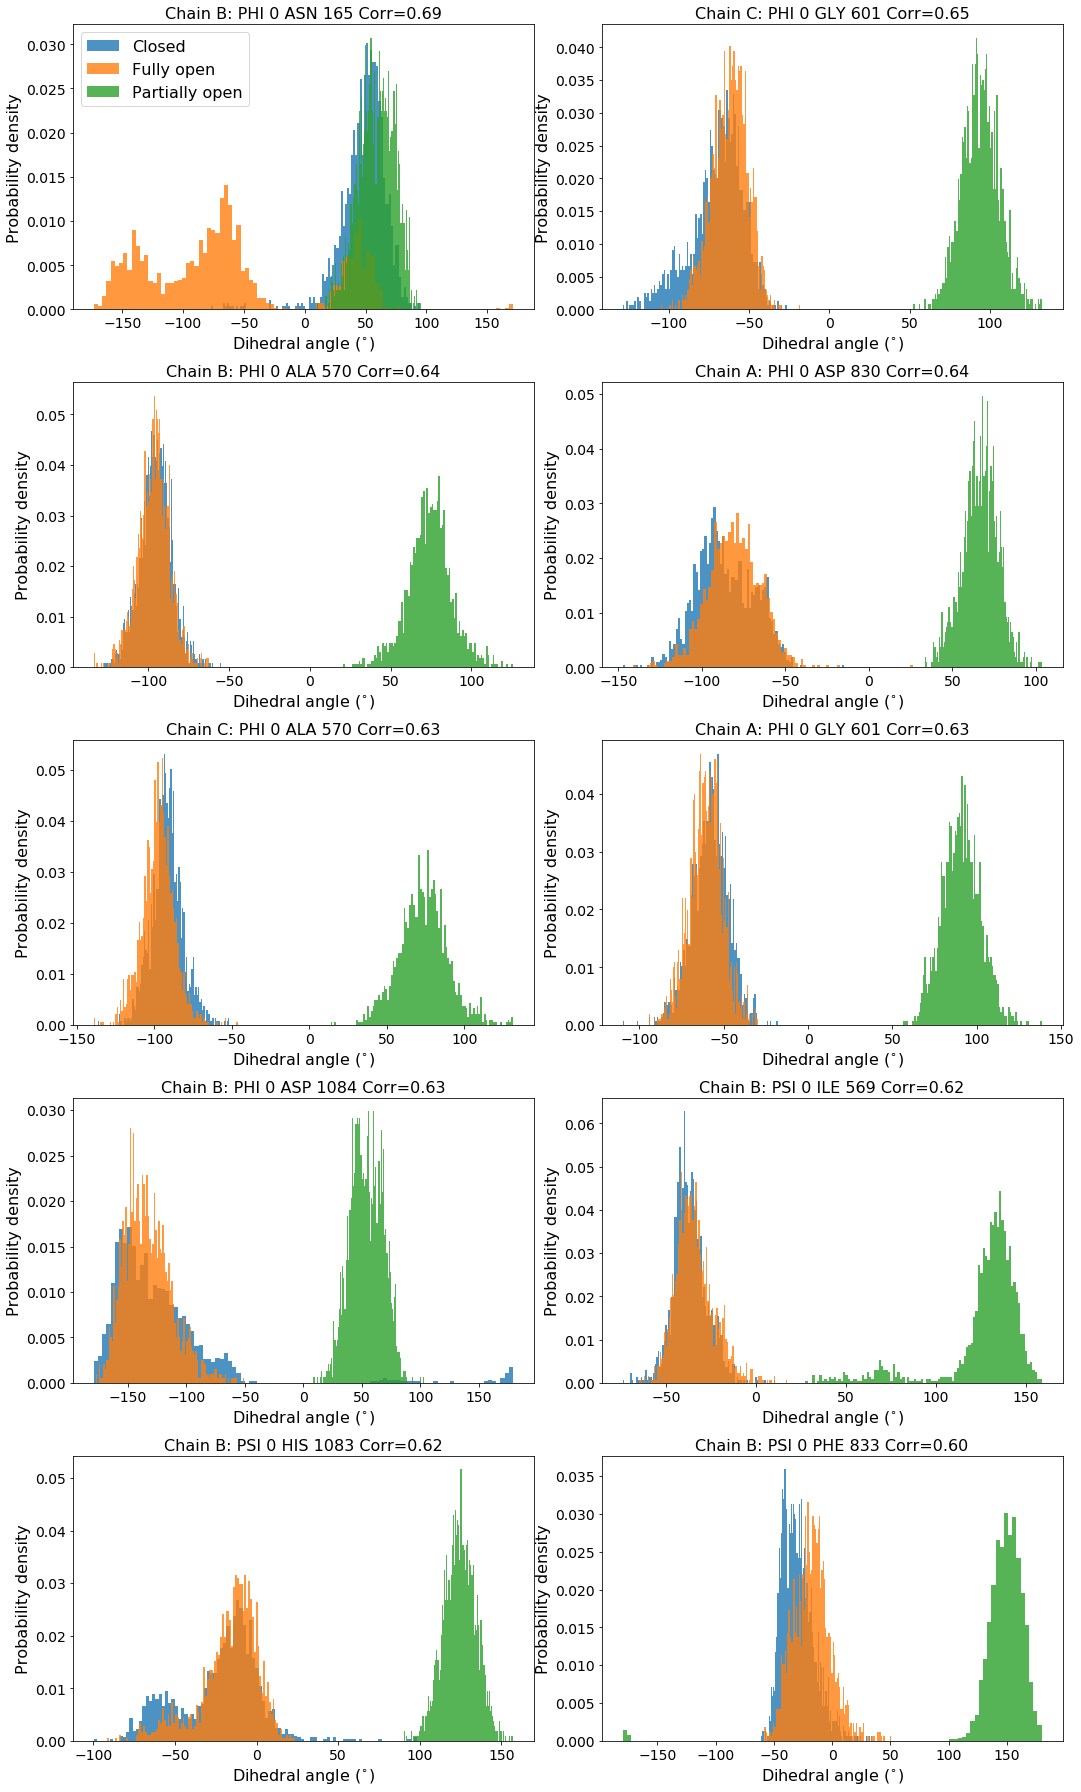

In [11]:
#Make plots of the top 10 positive and positive correlation (tIC 2 cos)
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


N = 10
l = np.loadtxt('sorted_tIC_2_sin_corr.dat')
for i in range(N):
    angle = l[-(i+1),0]
    corr = l[-(i+1),1]
   
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    ax = fig.add_subplot(5,2, i+1)
    
    ax.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    ax.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    ax.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    if i==0:
        ax.legend(fontsize=16)
    
    ax.set_xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)        
    ax.set_ylabel('Probability density',fontsize=16)
    
    
    
    ax.set_title(chain+': '+feat.describe()[int(angle)]+' Corr=%0.2f'%corr, fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.tight_layout()

plt.savefig('dihedral_dist_positive_tIC_2_sin.pdf')

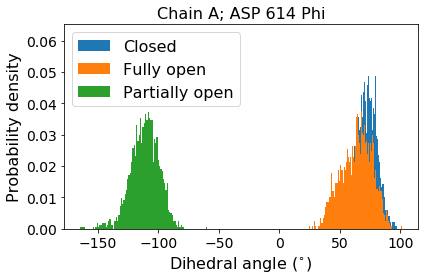

In [17]:
#Chain A; ASP 614 Phi
indices=[[9583,9585,9587,9595]]
a1 = md.compute_dihedrals(t,indices,opt=True)
b1 = a1*180.0/np.pi

a2 = md.compute_dihedrals(t2,indices,opt=True)
b2 = a2*180.0/np.pi

a3 = md.compute_dihedrals(t3,indices,opt=True)
b3 = a3*180.0/np.pi

plt.hist(b1,bins=100,density=True,label='Closed')
plt.hist(b2,bins=100,density=True,label='Fully open')
plt.hist(b3,bins=100,density=True,label='Partially open')
plt.legend(fontsize=16)
plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)
plt.ylabel('Probability density',fontsize=16)
plt.title('Chain A; ASP 614 Phi',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

#plt.show()
plt.savefig('chain_A_614_phi.pdf')

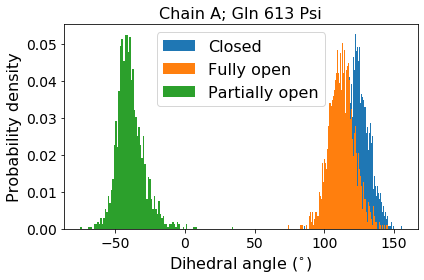

In [19]:
#Chain A; Gly 613 Psi
indices=[[9568,9570,9583,9585]]
a1 = md.compute_dihedrals(t,indices,opt=True)
b1 = a1*180.0/np.pi

a2 = md.compute_dihedrals(t2,indices,opt=True)
b2 = a2*180.0/np.pi

a3 = md.compute_dihedrals(t3,indices,opt=True)
b3 = a3*180.0/np.pi

plt.hist(b1,bins=100,density=True,label='Closed')
plt.hist(b2,bins=100,density=True,label='Fully open')
plt.hist(b3,bins=100,density=True,label='Partially open')
plt.legend(fontsize=16)
plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)
plt.ylabel('Probability density',fontsize=16)
plt.title('Chain A; Gln 613 Psi',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

#plt.show()
plt.savefig('chain_A_Gln_613_psi.pdf')

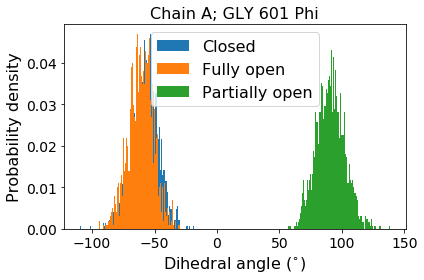

In [21]:
#Chain A; GLY 601 Phi
indices=[[9394,9396,9398,9401]]
a1 = md.compute_dihedrals(t,indices,opt=True)
b1 = a1*180.0/np.pi

a2 = md.compute_dihedrals(t2,indices,opt=True)
b2 = a2*180.0/np.pi

a3 = md.compute_dihedrals(t3,indices,opt=True)
b3 = a3*180.0/np.pi

plt.hist(b1,bins=100,density=True,label='Closed')
plt.hist(b2,bins=100,density=True,label='Fully open')
plt.hist(b3,bins=100,density=True,label='Partially open')
plt.legend(fontsize=16)
plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)
plt.ylabel('Probability density',fontsize=16)
plt.title('Chain A; GLY 601 Phi',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

#plt.show()
plt.savefig('chain_A_gly_601_phi.pdf')

In [ ]:
#Chain A; ILE 624 Psi
indices=[[9721,9723,9738,]]
a1 = md.compute_dihedrals(t,indices,opt=True)
b1 = a1*180.0/np.pi

a2 = md.compute_dihedrals(t2,indices,opt=True)
b2 = a2*180.0/np.pi

a3 = md.compute_dihedrals(t3,indices,opt=True)
b3 = a3*180.0/np.pi

plt.hist(b1,bins=100,density=True,label='Closed')
plt.hist(b2,bins=100,density=True,label='Fully open')
plt.hist(b3,bins=100,density=True,label='Partially open')
plt.legend(fontsize=16)
plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=16)
plt.ylabel('Probability density',fontsize=16)
plt.title('Chain A; GLY 601 Phi',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

#plt.show()
#plt.savefig('chain_A_gly_601_phi.pdf')

In [3]:
def plot_dist(angle,legend=False,xlabel=False,ylabel=False): #,location):  
    
    #decide which chain
    if angle < 2292:
        chain = 'Chain A'
    elif angle > 2292 and angle < 4584:
        chain = 'Chain B'
    elif angle > 4584:
        chain = 'Chain C'
    
    
    dih_closed = np.loadtxt('dihedral-data/dihedral_%d_traj_2'%angle)
    dih_closed *= 180.0/np.pi
    
    dih_fully_open = np.loadtxt('dihedral-data/dihedral_%d_traj_19'%angle)
    dih_fully_open *= 180.0/np.pi
    
    dih_partially_open = np.loadtxt('dihedral-data/dihedral_%d_traj_35'%angle)
    dih_partially_open *= 180.0/np.pi
    
    #plotting
    #ax = fig.add_subplot(2,2,location)
    
    plt.hist(dih_closed,bins=100,density=True,label='Closed',alpha=0.8)
    plt.hist(dih_fully_open,bins=100,density=True,label='Fully open',alpha=0.8)
    plt.hist(dih_partially_open,bins=100,density=True,label='Partially open',alpha=0.8)
    
    if legend==True:
        plt.legend(fontsize=20)
    if xlabel == True:
        plt.xlabel('Dihedral angle ($^{\circ}$)',fontsize=24)
    if ylabel == True:
        plt.ylabel('Probability density',fontsize=24)
    
    
    
    plt.title(chain+': '+feat.describe()[int(angle)], fontsize=24)
    
    plt.tick_params(labelsize=18)


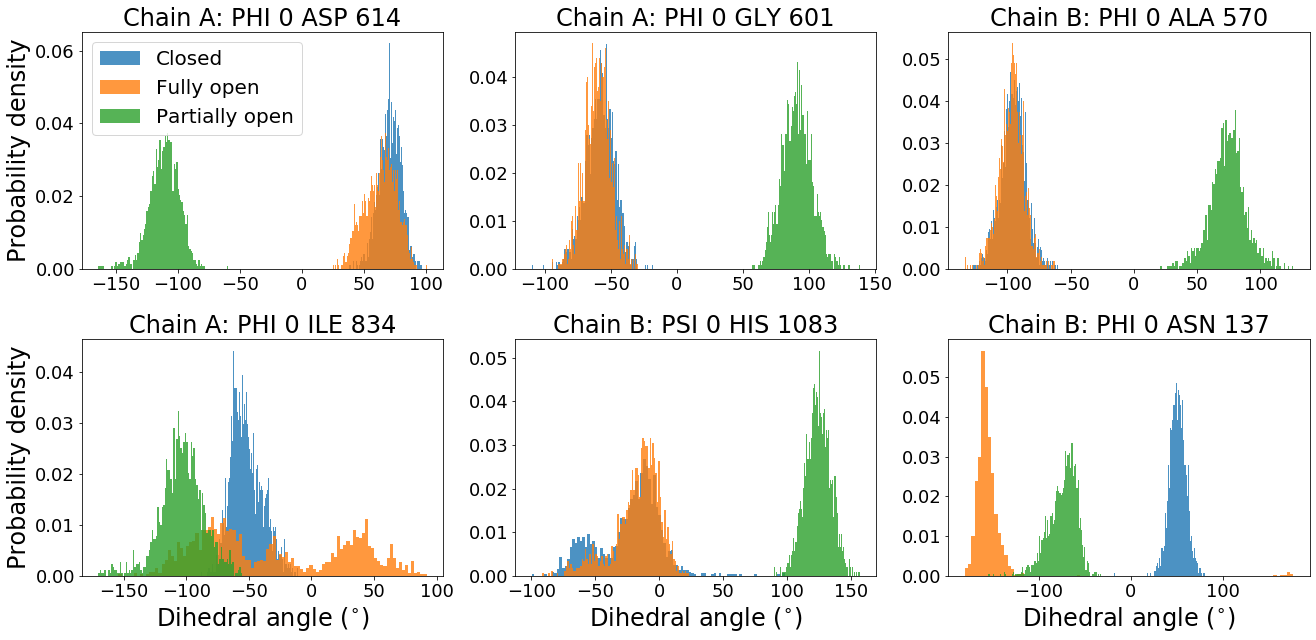

In [9]:
fig = plt.figure(figsize=(22,10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(2,3,1)
plot_dist(1224,legend=True,ylabel=True)
plt.subplot(2,3,2)
plot_dist(1198)
plt.subplot(2,3,3)
plot_dist(1136+2292)
plt.subplot(2,3,4)
plot_dist(1664,ylabel=True,xlabel=True)
plt.subplot(2,3,5)
plot_dist(4455,xlabel=True)
plt.subplot(2,3,6)
plot_dist(2562,xlabel=True)
#plt.show()
plt.savefig('dihedral-distribution-overall.pdf',bbox_inches='tight')

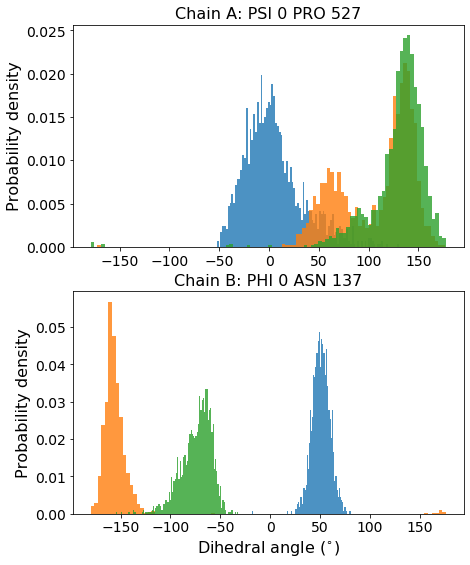

In [39]:
fig = plt.figure(figsize=(7,9))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(2,1,1)
plot_dist(1053,ylabel=True)
plt.subplot(2,1,2)
plot_dist(1672,xlabel=True,ylabel=True)


#plt.show()
plt.savefig('dihedral-three-state-seperation.pdf')